In [24]:
suppressWarnings(suppressMessages(library(dplyr)))
suppressWarnings(suppressMessages(library(tidyr)))
suppressMessages(require(reshape))
suppressMessages(library(gridExtra))
suppressMessages(library(RColorBrewer))
suppressMessages(library(ggpubr))
suppressWarnings(suppressMessages(library(viridis)))
suppressWarnings(suppressMessages(library(viridis)))

suppressWarnings(suppressMessages(library(UpSetR)))
suppressWarnings(suppressMessages(library(ggplot2)))
suppressWarnings(suppressMessages(library(ComplexUpset)))
suppressWarnings(suppressMessages(library('ggplot2movies')))
suppressWarnings(suppressMessages(library('ComplexHeatmap')))
suppressWarnings(suppressMessages(library('ggplot2movies')))
Sys.setlocale("LC_ALL", "en_US.UTF-8")

[1] "LC_COLLATE=en_US.UTF-8;LC_CTYPE=en_US.UTF-8;LC_MONETARY=en_US.UTF-8;LC_NUMERIC=C;LC_TIME=en_US.UTF-8"

In [2]:
df1 <- read.table("../../../reports/Master Table/RESULTS_FDR_LASTLEVELONLY_v2.TAB",header=TRUE)
gene <- read.csv("../../../../PNAS/DATA/CCNA_ref.csv",header=TRUE,fill=TRUE)
head(gene)

,locus_tag,cc_tag,geneID,protein_id,description
,<chr>,<chr>,<chr>,<chr>,<chr>
1,CCNA_00001,CC_0001,NA,YP_002515376.1,ATP/GTP-binding protein
2,CCNA_00002,CC_0002,NA,YP_002515377.1,septum formation protein Maf
3,CCNA_00003,CC_0003,NA,YP_002515378.1,shikimate 5-dehydrogenase
4,CCNA_00004,CC_0004,NA,YP_002515379.1,dephospho-CoA kinase
5,CCNA_00005,CC_0005,dnaQ,NA,NA
6,CCNA_00006,CC_0006,NA,YP_002515381.1,enoyl-CoA hydratase


In [3]:
#CE

In [4]:
df <- df1%>%filter(Annotation_UC=="Conditionally_Essential")%>%select(strain,condition,slevel,locus_tag)%>%unite(title,strain, condition, slevel, sep = ":", remove = FALSE)
df$title <- gsub("DLON","LON",df$title)
df$title <- gsub("dnak-dnaJ","dnaKJ-NI",df$title)
df$title <- gsub("DCLPA","CLPA",df$title)
df$title <- gsub("DCLPB","CLPB",df$title)
df$title <- gsub("wild-type","WT",df$title)
df$title <- gsub("canavanine","CN",df$title)
df$title <- gsub("oxidative-peroxide","OS",df$title)
df$title <- gsub("heat","HT",df$title)
df$title <- gsub("HIGH","H",df$title)
df$title <- gsub("MEDIUM","M",df$title)
df$title <- gsub("LOW","L",df$title)
df <- df%>%select(title,locus_tag)%>%dplyr::rename("stress"="title")

In [12]:
title <- c('WT:CN:L','WT:CN:M','WT:CN:H','WT:HT:L','WT:HT:M','WT:HT:H','WT:OS:L','WT:OS:M','WT:OS:H',
'LON:CN:L','LON:CN:M','LON:CN:H','LON:HT:L','LON:HT:M','LON:HT:H','LON:OS:L','LON:OS:M','LON:OS:H',
'CLPA:CN:L','CLPA:CN:M','CLPA:CN:H','CLPA:HT:L','CLPA:HT:M','CLPA:HT:H','CLPA:OS:L','CLPA:OS:M','CLPA:OS:H',
'CLPB:CN:L','CLPB:CN:M','CLPB:CN:H','CLPB:HT:L','CLPB:HT:M','CLPB:HT:H','CLPB:OS:L','CLPB:OS:M','CLPB:OS:H',
'dnaKJ-NI:CN:L','dnaKJ-NI:CN:M','dnaKJ-NI:CN:H','dnaKJ-NI:HT:L','dnaKJ-NI:HT:M','dnaKJ-NI:HT:H','dnaKJ-NI:OS:L','dnaKJ-NI:OS:M','dnaKJ-NI:OS:H')
title <- gsub("LON", paste0("\u0394", "lon"), title)
title <- gsub("CLPA", paste0("\u0394", "clpA"), title)
title <- gsub("CLPB", paste0("\u0394", "clpB"), title)


In [13]:
title

[1] "WT:CN:L"       "WT:CN:M"       "WT:CN:H"       "WT:HT:L"      
 [5] "WT:HT:M"       "WT:HT:H"       "WT:OS:L"       "WT:OS:M"      
 [9] "WT:OS:H"       "Δlon:CN:L"     "Δlon:CN:M"     "Δlon:CN:H"    
[13] "Δlon:HT:L"     "Δlon:HT:M"     "Δlon:HT:H"     "Δlon:OS:L"    
[17] "Δlon:OS:M"     "Δlon:OS:H"     "ΔclpA:CN:L"    "ΔclpA:CN:M"   
[21] "ΔclpA:CN:H"    "ΔclpA:HT:L"    "ΔclpA:HT:M"    "ΔclpA:HT:H"   
[25] "ΔclpA:OS:L"    "ΔclpA:OS:M"    "ΔclpA:OS:H"    "ΔclpB:CN:L"   
[29] "ΔclpB:CN:M"    "ΔclpB:CN:H"    "ΔclpB:HT:L"    "ΔclpB:HT:M"   
[33] "ΔclpB:HT:H"    "ΔclpB:OS:L"    "ΔclpB:OS:M"    "ΔclpB:OS:H"   
[37] "dnaKJ-NI:CN:L" "dnaKJ-NI:CN:M" "dnaKJ-NI:CN:H" "dnaKJ-NI:HT:L"
[41] "dnaKJ-NI:HT:M" "dnaKJ-NI:HT:H" "dnaKJ-NI:OS:L" "dnaKJ-NI:OS:M"
[45] "dnaKJ-NI:OS:H"

In [14]:
m_title <- c('CN:L','CN:M','CN:H','HT:L','HT:M','HT:H','OS:L','OS:M','OS:H',
'CN:L','CN:M','CN:H','HT:L','HT:M','HT:H','OS:L','OS:M','OS:H',
'CN:L','CN:M','CN:H','HT:L','HT:M','HT:H','OS:L','OS:M','OS:H',
'CN:L','CN:M','CN:H','HT:L','HT:M','HT:H','OS:L','OS:M','OS:H',
'CN:L','CN:M','CN:H','HT:L','HT:M','HT:H','OS:L','OS:M','OS:H')


In [17]:
df$stress <- gsub("CLPA", paste0("\u0394", "clpA"),df$stress)
df$stress <- gsub("CLPB", paste0("\u0394", "clpB"), df$stress)
df$stress <- gsub("LON", paste0("\u0394", "lon"), df$stress)

mat<- table(df[1:2]) %*% t(table(df[1:2]))
mat<-mat[match(title,row.names(mat)),match(title,colnames(mat))]
mat[upper.tri(mat, diag = TRUE)] <- 0

In [18]:
summary(na.omit(melt(mat)$value))

Warning message in type.convert.default(X[[i]], ...):
"'as.is' should be specified by the caller; using TRUE"
Warning message in type.convert.default(X[[i]], ...):
"'as.is' should be specified by the caller; using TRUE"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   0.000   0.000   4.812   4.000  88.000 

In [19]:
library(circlize)
col_fun = colorRamp2(c(0,20,40,90), c("white",'#FB8861FF','#FCFDBFFF','#30123BFF'))

In [20]:
row.names(mat)

[1] "WT:CN:L"       "WT:CN:M"       "WT:CN:H"       "WT:HT:L"      
 [5] "WT:HT:M"       "WT:HT:H"       "WT:OS:L"       "WT:OS:M"      
 [9] "WT:OS:H"       "Δlon:CN:L"     "Δlon:CN:M"     "Δlon:CN:H"    
[13] "Δlon:HT:L"     "Δlon:HT:M"     "Δlon:HT:H"     "Δlon:OS:L"    
[17] "Δlon:OS:M"     "Δlon:OS:H"     "ΔclpA:CN:L"    "ΔclpA:CN:M"   
[21] "ΔclpA:CN:H"    "ΔclpA:HT:L"    "ΔclpA:HT:M"    "ΔclpA:HT:H"   
[25] "ΔclpA:OS:L"    "ΔclpA:OS:M"    "ΔclpA:OS:H"    "ΔclpB:CN:L"   
[29] "ΔclpB:CN:M"    "ΔclpB:CN:H"    "ΔclpB:HT:L"    "ΔclpB:HT:M"   
[33] "ΔclpB:HT:H"    "ΔclpB:OS:L"    "ΔclpB:OS:M"    "ΔclpB:OS:H"   
[37] "dnaKJ-NI:CN:L" "dnaKJ-NI:CN:M" "dnaKJ-NI:CN:H" "dnaKJ-NI:HT:L"
[41] "dnaKJ-NI:HT:M" "dnaKJ-NI:HT:H" "dnaKJ-NI:OS:L" "dnaKJ-NI:OS:M"
[45] "dnaKJ-NI:OS:H"

In [26]:
suppressWarnings(ce <- Heatmap(mat, name ="Intersection_ce",rect_gp = gpar(col = "white", lwd = 2),show_column_dend = FALSE,show_row_dend = FALSE ,row_names_gp  = gpar(fontsize = 10, fontface = "italic"),
        column_names_gp  = gpar(fontsize = 10, fontface = "italic")  ,na_col = "grey",col = col_fun,column_order=match(title,row.names(mat)),row_order=match(title,row.names(mat)),
       column_title = "Conditionally Essential"))

In [28]:
jpeg(file="ce_heatmap.jpeg",width=10,height=10,res=300,units = "in")
suppressWarnings(draw(ce))
dev.off()

png 
  2

In [13]:
#cb

In [30]:
df <- df1%>%filter(Annotation_UC=="Conditionally_Beneficial")%>%select(strain,condition,slevel,locus_tag)%>%unite(title,strain, condition, slevel, sep = ":", remove = FALSE)
df$title <- gsub("DLON","LON",df$title)
df$title <- gsub("dnak-dnaJ","dnaKJ-NI",df$title)
df$title <- gsub("DCLPA","CLPA",df$title)
df$title <- gsub("DCLPB","CLPB",df$title)
df$title <- gsub("wild-type","WT",df$title)
df$title <- gsub("canavanine","CN",df$title)
df$title <- gsub("oxidative-peroxide","OS",df$title)
df$title <- gsub("heat","HT",df$title)
df$title <- gsub("HIGH","H",df$title)
df$title <- gsub("MEDIUM","M",df$title)
df$title <- gsub("LOW","L",df$title)
df <- df%>%select(title,locus_tag)%>%dplyr::rename("stress"="title")
df$stress <- gsub("CLPA", paste0("\u0394", "clpA"),df$stress)
df$stress <- gsub("CLPB", paste0("\u0394", "clpB"), df$stress)
df$stress <- gsub("LON", paste0("\u0394", "lon"), df$stress)

In [31]:
mat<- table(df[1:2]) %*% t(table(df[1:2]))
mat<-mat[match(title,row.names(mat)),match(title,colnames(mat))]
mat[upper.tri(mat, diag = TRUE)] <- 0

In [32]:
summary(na.omit(melt(mat)$value))

Warning message in type.convert.default(X[[i]], ...):
"'as.is' should be specified by the caller; using TRUE"
Warning message in type.convert.default(X[[i]], ...):
"'as.is' should be specified by the caller; using TRUE"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00    0.00    0.00    1.33    2.00   24.00 

In [34]:
library(circlize)
col_fun = colorRamp2(c(0,3,6,10,24), c("white", "yellow", "orange","red","darkred"))

In [35]:
suppressWarnings(cb <- Heatmap(mat, name ="Intersection_cb",rect_gp = gpar(col = "white", lwd = 2),show_column_dend = FALSE,show_row_dend = FALSE ,row_names_gp  = gpar(fontsize = 10, fontface = "italic"),
        column_names_gp  = gpar(fontsize = 10, fontface = "italic")  ,na_col = "grey",col = col_fun,column_order=match(title,row.names(mat)),row_order=match(title,row.names(mat)),
       column_title = "Conditionally beneficial"))

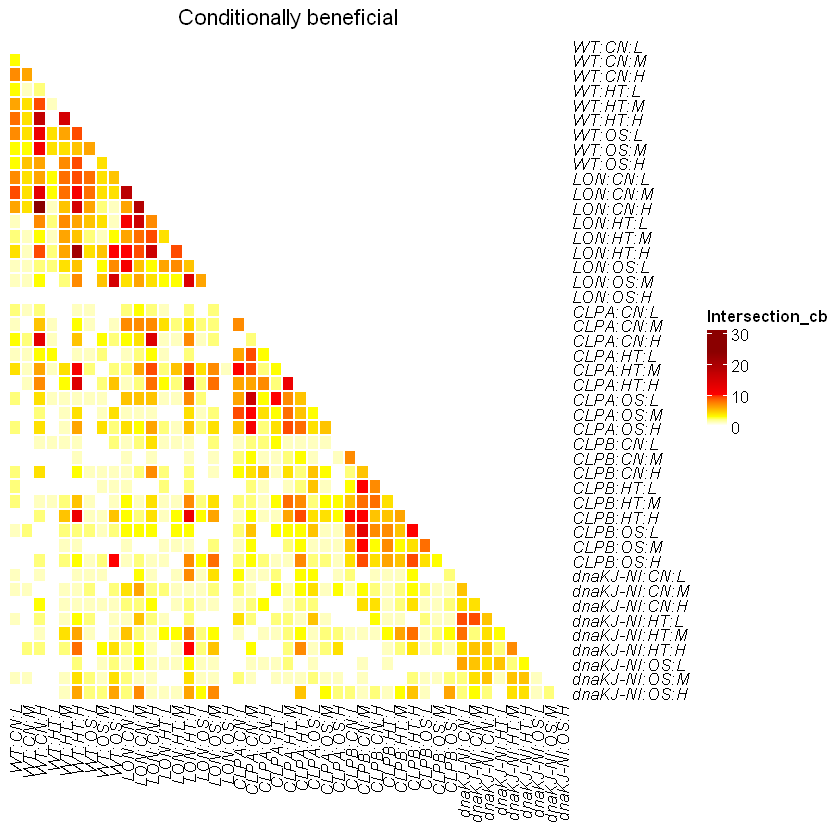

In [20]:
draw(cb)

In [36]:
jpeg(file="cb_heatmap.jpeg",width=10,height=10,res=300,units = "in")
suppressWarnings(draw(cb))
dev.off()

png 
  2

In [22]:
#CD

In [37]:
df <- df1%>%filter(Annotation_UC=="Conditionally_Detrimental")%>%select(strain,condition,slevel,locus_tag)%>%unite(title,strain, condition, slevel, sep = ":", remove = FALSE)
df$title <- gsub("DLON","LON",df$title)
df$title <- gsub("dnak-dnaJ","dnaKJ-NI",df$title)
df$title <- gsub("DCLPA","CLPA",df$title)
df$title <- gsub("DCLPB","CLPB",df$title)
df$title <- gsub("wild-type","WT",df$title)
df$title <- gsub("canavanine","CN",df$title)
df$title <- gsub("oxidative-peroxide","OS",df$title)
df$title <- gsub("heat","HT",df$title)
df$title <- gsub("HIGH","H",df$title)
df$title <- gsub("MEDIUM","M",df$title)
df$title <- gsub("LOW","L",df$title)
df <- df%>%select(title,locus_tag)%>%dplyr::rename("stress"="title")
df$stress <- gsub("CLPA", paste0("\u0394", "clpA"),df$stress)
df$stress <- gsub("CLPB", paste0("\u0394", "clpB"), df$stress)
df$stress <- gsub("LON", paste0("\u0394", "lon"), df$stress)

In [38]:
mat<- table(df[1:2]) %*% t(table(df[1:2]))
mat<-mat[match(title,row.names(mat)),match(title,colnames(mat))]
mat[upper.tri(mat, diag = TRUE)] <- 0

In [39]:
summary(na.omit(melt(mat)$value))

Warning message in type.convert.default(X[[i]], ...):
"'as.is' should be specified by the caller; using TRUE"
Warning message in type.convert.default(X[[i]], ...):
"'as.is' should be specified by the caller; using TRUE"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   0.000   0.000   2.779   2.000  87.000 

In [40]:
library(circlize)
col_fun = colorRamp2(c(0,10,20,40,88), c("white", "yellow", "orange","red","darkred"))

In [41]:
suppressWarnings(cd <- Heatmap(mat, name ="Intersection_cd",rect_gp = gpar(col = "white", lwd = 2),show_column_dend = FALSE,show_row_dend = FALSE ,row_names_gp  = gpar(fontsize = 10, fontface = "italic"),
        column_names_gp  = gpar(fontsize = 10, fontface = "italic")  ,na_col = "grey",col = col_fun,column_order=match(title,row.names(mat)),row_order=match(title,row.names(mat)),
       column_title = "Conditionally detrimental"))

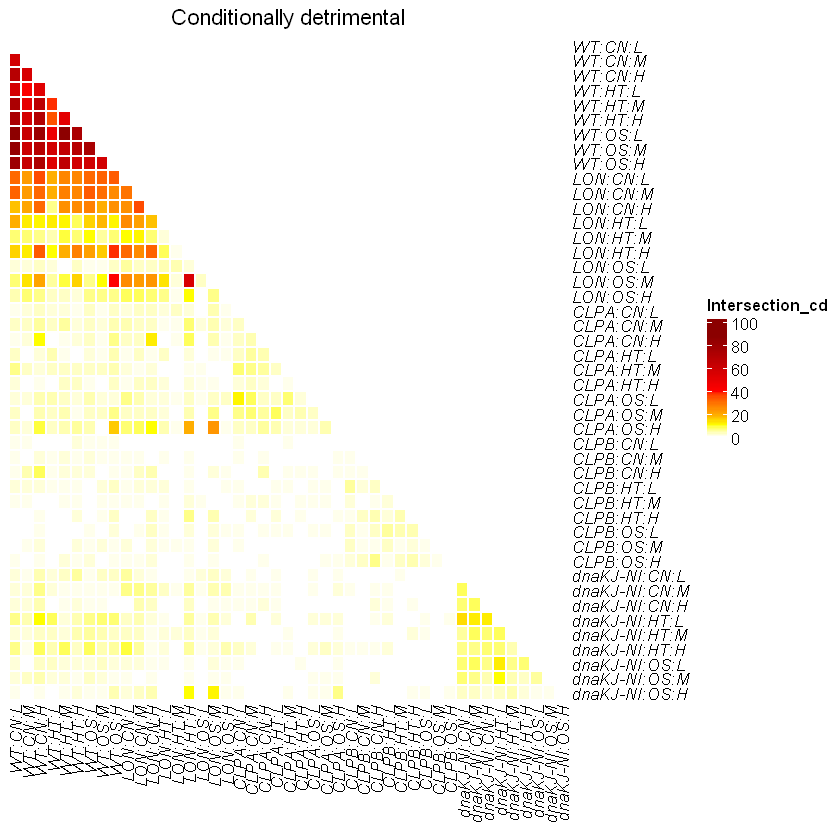

In [28]:
cd

In [42]:
jpeg(file="cd_heatmap.jpeg",width=10,height=10,res=300,units = "in")
suppressWarnings(draw(cd))
dev.off()

png 
  2